In [1]:
import matplotlib.pyplot as plt
%cd c:\Users\thibault.simonetto\repo\moeva
%load_ext autoreload
%autoreload 2

c:\Users\thibault.simonetto\repo\moeva


In [2]:

from src.utils.in_out import json_from_dir
import pandas as pd
from src.utils.metrics import parse_metrics
import seaborn as sns

In [14]:
from src.utils.metrics import add_human_names

projects = ["botnet", "botnet_rf", "lcld", "lcld_rf", "malware_rf", "url", "url_rf"]
projects_eps = {"botnet": 4, "botnet_rf": 4, "lcld": 0.2, "lcld_rf": 0.2, "malware_rf": 0.2, "url": 0.1, "url_rf": 0.1}
rqs = [1,2,3]
metrics_folders = [f"./out/attacks_metrics/{project}/rq{rq}" for rq in rqs for project in projects]
metrics = []
for metrics_folder in metrics_folders:
    metrics.extend(json_from_dir(metrics_folder))


print(f"{len(metrics)} found.")
metrics_parsed = parse_metrics(metrics)
metrics_df = pd.DataFrame(metrics_parsed)
metrics_df = add_human_names(metrics_df)
metrics_df

294 found.


,n_input,config_hash,project_name,budget,time,model,reconstruction,attack_name,eps,o1,o2,o3,o4,o5,o6,o7,attack_name_human
0,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,0.20,1.000000,1.000000,1.0,1.000000,1.000000,0.049140,0.049140,MoEvA2
1,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,0.50,1.000000,1.000000,1.0,1.000000,1.000000,0.184275,0.103194,MoEvA2
2,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,1.00,1.000000,1.000000,1.0,1.000000,1.000000,0.203931,0.113022,MoEvA2
3,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,2.00,1.000000,1.000000,1.0,1.000000,1.000000,0.203931,0.113022,MoEvA2
4,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,4.00,1.000000,1.000000,1.0,1.000000,1.000000,0.213759,0.117936,MoEvA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,-1,60ac3d051309a4cc0ece355f1a969688,url_rf,100,759.128023,augmented,False,moeva,0.20,1.000000,0.325066,1.0,0.243578,1.000000,0.239150,0.209920,MoEvA2
425,-1,b72b3909a06887d799acd7afd485d803,url_rf,100,545.743375,augmented,False,papernot,0.01,0.984057,0.054916,1.0,0.054030,0.984057,0.054916,0.054030,Iterative Papernot
426,-1,bb1cfd51d4f5b0f3703a4c58abef38d1,url_rf,100,521.236968,augmented,False,papernot,0.20,0.698849,0.077945,1.0,0.048716,0.698849,0.077945,0.048716,Iterative Papernot
427,-1,d1eb74662293c6c63f206f7b1e398dc3,url_rf,100,542.200477,augmented,False,papernot,0.05,0.919398,0.059345,1.0,0.055802,0.919398,0.059345,0.055802,Iterative Papernot


# Table by RQs and Projects

In [4]:
from IPython.display import display, Markdown, Latex
display(metrics_df)
display(metrics_df.iloc[44])

,n_input,config_hash,project_name,budget,time,model,reconstruction,attack_name,eps,o1,o2,o3,o4,o5,o6,o7,attack_name_human
0,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,0.20,1.000000,1.000000,1.0,1.000000,1.000000,0.049140,0.049140,MoEvA2
1,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,0.50,1.000000,1.000000,1.0,1.000000,1.000000,0.184275,0.103194,MoEvA2
2,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,1.00,1.000000,1.000000,1.0,1.000000,1.000000,0.203931,0.113022,MoEvA2
3,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,2.00,1.000000,1.000000,1.0,1.000000,1.000000,0.203931,0.113022,MoEvA2
4,-1,389de3e95871312af35478b18c22582b,botnet,100,106.971594,baseline,False,moeva,4.00,1.000000,1.000000,1.0,1.000000,1.000000,0.213759,0.117936,MoEvA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,-1,60ac3d051309a4cc0ece355f1a969688,url_rf,100,759.128023,augmented,False,moeva,0.20,1.000000,0.325066,1.0,0.243578,1.000000,0.239150,0.209920,MoEvA2
421,-1,b72b3909a06887d799acd7afd485d803,url_rf,100,545.743375,augmented,False,papernot,0.01,0.984057,0.054916,1.0,0.054030,0.984057,0.054916,0.054030,Iterative Papernot
422,-1,bb1cfd51d4f5b0f3703a4c58abef38d1,url_rf,100,521.236968,augmented,False,papernot,0.20,0.698849,0.077945,1.0,0.048716,0.698849,0.077945,0.048716,Iterative Papernot
423,-1,d1eb74662293c6c63f206f7b1e398dc3,url_rf,100,542.200477,augmented,False,papernot,0.05,0.919398,0.059345,1.0,0.055802,0.919398,0.059345,0.055802,Iterative Papernot


n_input                                            -1
config_hash          be72070bd5e88407a2a396a087bf0e93
project_name                                botnet_rf
budget                                           1000
time                                          330.055
model                                        baseline
reconstruction                                  False
attack_name                                     moeva
eps                                                 4
o1                                                  1
o2                                          0.0761671
o3                                                  1
o4                                          0.0540541
o5                                                  1
o6                                          0.0761671
o7                                          0.0540541
attack_name_human                              MoEvA2
Name: 44, dtype: object

In [18]:
columns_to_display_rq1 = ["budget", "project_eps", "project_name", "attack_name_human","o7"]
columns_to_display_rq2 = ["budget", "project_eps", "project_name", "model", "attack_name_human","o7"]
columns_human_name = {
    "budget": "Iterations",
    "project_eps": "Distance",
    "project_name": "Project",
    "model": "Defense",
    "attack_name_human": "Attack",
    "o7": "Success rate"
}
sort_attack = ["PGD", "C-PGD", "Iterative Papernot", "MoEvA2"]
sort_attack_rq2 = ["C-PGD", "Iterative Papernot", "MoEvA2"]
metrics_df["project_eps"] = metrics_df["project_name"].map(projects_eps)
metrics_df["sort_attacks"] = metrics_df["attack_name_human"].map(dict(zip(sort_attack, range(len(sort_attack)))))

# RQ1
display(Markdown(f"# RQ1"))
filter_df = (metrics_df["model"] == "baseline") & \
            (~(metrics_df["attack_name_human"].isna())) & \
            (metrics_df["eps"] == metrics_df["project_eps"])

filtered = metrics_df[filter_df]
for project in projects:
    filter_df = filtered["project_name"] == project
    filtered_project = filtered[filter_df]
    sorted_df = filtered_project.sort_values(by=["project_name", "sort_attacks", "budget"])
    to_display = sorted_df[columns_to_display_rq1]
    to_display = to_display.rename(columns=columns_human_name)
    display(Markdown(f"{to_display.to_markdown()}"))

# RQ2
display(Markdown(f"# RQ2 + RQ3"))
filter_df = (~(metrics_df["attack_name_human"].isna())) & \
            (metrics_df["eps"] == metrics_df["project_eps"])

filtered = metrics_df[filter_df]
for project in projects:
    filter_df = filtered["project_name"] == project
    filtered_project = filtered[filter_df]
    sorted_df = filtered_project.sort_values(by=["project_name", "model", "sort_attacks", "budget"])
    to_display = sorted_df[columns_to_display_rq2]
    to_display = to_display.rename(columns=columns_human_name)
    display(Markdown(f"{to_display.to_markdown()}"))

# RQ1

|    |   Iterations |   Distance | Project   | Attack   |   Success rate |
|---:|-------------:|-----------:|:----------|:---------|---------------:|
| 33 |          100 |          4 | botnet    | PGD      |       0        |
| 11 |          100 |          4 | botnet    | C-PGD    |       0        |
|  4 |          100 |          4 | botnet    | MoEvA2   |       0.117936 |
|  9 |         1000 |          4 | botnet    | MoEvA2   |       1        |

|    |   Iterations |   Distance | Project   | Attack             |   Success rate |
|---:|-------------:|-----------:|:----------|:-------------------|---------------:|
| 54 |          100 |          4 | botnet_rf | Iterative Papernot |      0         |
| 50 |         1000 |          4 | botnet_rf | Iterative Papernot |      0         |
| 39 |          100 |          4 | botnet_rf | MoEvA2             |      0.046683  |
| 44 |         1000 |          4 | botnet_rf | MoEvA2             |      0.0540541 |

|    |   Iterations |   Distance | Project   | Attack   |   Success rate |
|---:|-------------:|-----------:|:----------|:---------|---------------:|
| 75 |          100 |        0.2 | lcld      | PGD      |       0        |
| 60 |          100 |        0.2 | lcld      | C-PGD    |       0.415209 |
| 58 |          100 |        0.2 | lcld      | MoEvA2   |       0.992272 |

|    |   Iterations |   Distance | Project   | Attack             |   Success rate |
|---:|-------------:|-----------:|:----------|:-------------------|---------------:|
| 86 |          100 |        0.2 | lcld_rf   | Iterative Papernot |       0        |
| 82 |          100 |        0.2 | lcld_rf   | MoEvA2             |       0.415132 |

|    |   Iterations |   Distance | Project    | Attack             |   Success rate |
|---:|-------------:|-----------:|:-----------|:-------------------|---------------:|
| 94 |          100 |        0.2 | malware_rf | Iterative Papernot |       0        |
| 90 |          100 |        0.2 | malware_rf | MoEvA2             |       0.392966 |

|     |   Iterations |   Distance | Project   | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:---------|---------------:|
| 114 |          100 |        0.1 | url       | PGD      |       0.18512  |
| 298 |          100 |        0.1 | url       | C-PGD    |       0.186891 |
|  97 |          100 |        0.1 | url       | MoEvA2   |       0.201063 |

|     |   Iterations |   Distance | Project   | Attack             |   Success rate |
|----:|-------------:|-----------:|:----------|:-------------------|---------------:|
| 122 |          100 |        0.1 | url_rf    | Iterative Papernot |      0.0752879 |
| 117 |          100 |        0.1 | url_rf    | MoEvA2             |      0.196634  |

# RQ2 + RQ3

|     |   Iterations |   Distance | Project   | Defense             | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:--------------------|:---------|---------------:|
| 156 |          100 |          4 | botnet    | adv_moeva           | C-PGD    |      0         |
| 147 |          100 |          4 | botnet    | adv_moeva           | MoEvA2   |      0.041769  |
| 132 |         1000 |          4 | botnet    | adv_moeva           | MoEvA2   |      0.208845  |
| 160 |          100 |          4 | botnet    | adv_moeva_1000      | C-PGD    |      0         |
| 137 |          100 |          4 | botnet    | adv_moeva_1000      | MoEvA2   |      0.046683  |
| 152 |         1000 |          4 | botnet    | adv_moeva_1000      | MoEvA2   |      0.496314  |
| 165 |          100 |          4 | botnet    | adv_moeva_1000_full | C-PGD    |      0         |
| 142 |          100 |          4 | botnet    | adv_moeva_1000_full | MoEvA2   |      0.0565111 |
| 127 |         1000 |          4 | botnet    | adv_moeva_1000_full | MoEvA2   |      0.808354  |
| 351 |          100 |          4 | botnet    | augmented           | C-PGD    |      0         |
| 347 |          100 |          4 | botnet    | augmented           | MoEvA2   |      0.04914   |
| 342 |         1000 |          4 | botnet    | augmented           | MoEvA2   |      0.164619  |
|  33 |          100 |          4 | botnet    | baseline            | PGD      |      0         |
|  11 |          100 |          4 | botnet    | baseline            | C-PGD    |      0         |
|   4 |          100 |          4 | botnet    | baseline            | MoEvA2   |      0.117936  |
|   9 |         1000 |          4 | botnet    | baseline            | MoEvA2   |      1         |

|     |   Iterations |   Distance | Project   | Defense        | Attack             |   Success rate |
|----:|-------------:|-----------:|:----------|:---------------|:-------------------|---------------:|
| 188 |          100 |          4 | botnet_rf | adv_moeva      | Iterative Papernot |      0         |
| 172 |          100 |          4 | botnet_rf | adv_moeva      | MoEvA2             |      0.041769  |
| 177 |         1000 |          4 | botnet_rf | adv_moeva      | MoEvA2             |      0.04914   |
| 192 |          100 |          4 | botnet_rf | adv_moeva_1000 | Iterative Papernot |      0         |
| 187 |          100 |          4 | botnet_rf | adv_moeva_1000 | MoEvA2             |      0.044226  |
| 182 |         1000 |          4 | botnet_rf | adv_moeva_1000 | MoEvA2             |      0.046683  |
| 370 |          100 |          4 | botnet_rf | augmented      | Iterative Papernot |      0         |
| 372 |         1000 |          4 | botnet_rf | augmented      | Iterative Papernot |      0         |
| 362 |          100 |          4 | botnet_rf | augmented      | MoEvA2             |      0.044226  |
| 357 |         1000 |          4 | botnet_rf | augmented      | MoEvA2             |      0.0663391 |
|  54 |          100 |          4 | botnet_rf | baseline       | Iterative Papernot |      0         |
|  50 |         1000 |          4 | botnet_rf | baseline       | Iterative Papernot |      0         |
|  39 |          100 |          4 | botnet_rf | baseline       | MoEvA2             |      0.046683  |
|  44 |         1000 |          4 | botnet_rf | baseline       | MoEvA2             |      0.0540541 |

|     |   Iterations |   Distance | Project   | Defense        | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:---------------|:---------|---------------:|
| 266 |          100 |        0.2 | lcld      | adv_cpgd       | PGD      |       0        |
| 216 |          100 |        0.2 | lcld      | adv_cpgd       | C-PGD    |       0.198136 |
| 201 |          100 |        0.2 | lcld      | adv_cpgd       | MoEvA2   |       0.995977 |
| 263 |          100 |        0.2 | lcld      | adv_moeva      | PGD      |       0        |
| 219 |          100 |        0.2 | lcld      | adv_moeva      | C-PGD    |       0.335176 |
| 205 |          100 |        0.2 | lcld      | adv_moeva      | MoEvA2   |       0.985151 |
| 261 |          100 |        0.2 | lcld      | adv_moeva_full | PGD      |       0        |
| 212 |          100 |        0.2 | lcld      | adv_moeva_full | C-PGD    |       0.278594 |
| 209 |          100 |        0.2 | lcld      | adv_moeva_full | MoEvA2   |       0.898774 |
| 390 |          100 |        0.2 | lcld      | augmented      | PGD      |       0        |
| 380 |          100 |        0.2 | lcld      | augmented      | C-PGD    |       0.168111 |
| 376 |          100 |        0.2 | lcld      | augmented      | MoEvA2   |       0.990973 |
|  75 |          100 |        0.2 | lcld      | baseline       | PGD      |       0        |
|  60 |          100 |        0.2 | lcld      | baseline       | C-PGD    |       0.415209 |
|  58 |          100 |        0.2 | lcld      | baseline       | MoEvA2   |       0.992272 |

|     |   Iterations |   Distance | Project   | Defense   | Attack             |   Success rate |
|----:|-------------:|-----------:|:----------|:----------|:-------------------|---------------:|
| 275 |          100 |        0.2 | lcld_rf   | adv_moeva | Iterative Papernot |    0           |
| 273 |          100 |        0.2 | lcld_rf   | adv_moeva | MoEvA2             |    0.0205352   |
| 398 |          100 |        0.2 | lcld_rf   | augmented | Iterative Papernot |    0.000128345 |
| 396 |          100 |        0.2 | lcld_rf   | augmented | MoEvA2             |    0.19733     |
|  86 |          100 |        0.2 | lcld_rf   | baseline  | Iterative Papernot |    0           |
|  82 |          100 |        0.2 | lcld_rf   | baseline  | MoEvA2             |    0.415132    |

|     |   Iterations |   Distance | Project    | Defense        | Attack             |   Success rate |
|----:|-------------:|-----------:|:-----------|:---------------|:-------------------|---------------:|
| 285 |          100 |        0.2 | malware_rf | adv_moeva_full | Iterative Papernot |     0          |
| 281 |          100 |        0.2 | malware_rf | adv_moeva_full | MoEvA2             |     0.345566   |
| 406 |          100 |        0.2 | malware_rf | augmented      | Iterative Papernot |     0.00611621 |
| 404 |          100 |        0.2 | malware_rf | augmented      | MoEvA2             |     0.285168   |
|  94 |          100 |        0.2 | malware_rf | baseline       | Iterative Papernot |     0          |
|  90 |          100 |        0.2 | malware_rf | baseline       | MoEvA2             |     0.392966   |

|     |   Iterations |   Distance | Project   | Defense   | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:----------|:---------|---------------:|
| 299 |          100 |        0.1 | url       | adv_cpgd  | C-PGD    |      0.088574  |
| 292 |          100 |        0.1 | url       | adv_cpgd  | MoEvA2   |      0.173605  |
| 294 |          100 |        0.1 | url       | adv_moeva | C-PGD    |      0.0894597 |
| 288 |          100 |        0.1 | url       | adv_moeva | MoEvA2   |      0.159433  |
| 413 |          100 |        0.1 | url       | augmented | C-PGD    |      0.0496014 |
| 411 |          100 |        0.1 | url       | augmented | MoEvA2   |      0.0868025 |
| 114 |          100 |        0.1 | url       | baseline  | PGD      |      0.18512   |
| 298 |          100 |        0.1 | url       | baseline  | C-PGD    |      0.186891  |
|  97 |          100 |        0.1 | url       | baseline  | MoEvA2   |      0.201063  |

|     |   Iterations |   Distance | Project   | Defense        | Attack             |   Success rate |
|----:|-------------:|-----------:|:----------|:---------------|:-------------------|---------------:|
| 332 |          100 |        0.1 | url_rf    | adv_moeva      | Iterative Papernot |      0.0398583 |
| 316 |          100 |        0.1 | url_rf    | adv_moeva      | MoEvA2             |      0.14349   |
| 326 |          100 |        0.1 | url_rf    | adv_moeva_full | Iterative Papernot |      0.0380868 |
| 320 |          100 |        0.1 | url_rf    | adv_moeva_full | MoEvA2             |      0.105403  |
| 331 |          100 |        0.1 | url_rf    | adv_papernot   | Iterative Papernot |      0.0478299 |
| 324 |          100 |        0.1 | url_rf    | adv_papernot   | MoEvA2             |      0.189548  |
| 424 |          100 |        0.1 | url_rf    | augmented      | Iterative Papernot |      0.0504872 |
| 419 |          100 |        0.1 | url_rf    | augmented      | MoEvA2             |      0.157662  |
| 122 |          100 |        0.1 | url_rf    | baseline       | Iterative Papernot |      0.0752879 |
| 117 |          100 |        0.1 | url_rf    | baseline       | MoEvA2             |      0.196634  |

# Graph defenses

In [6]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 2)
def graph_group_by(df, col, title_cols):
    group_by_col = df.columns.to_list()
    remove_col =  ["eps", "config_hash", "time"] + [f"o{i+1}" for i in range(7)] + [col]
    group_by_col = list(filter(lambda x:  x not in remove_col, group_by_col))

    groups = df.groupby(by=group_by_col)
    print(len(groups))

    for _, group in groups:

        sns.lineplot(x="eps", y="o7",
                 hue=col,
                 data=group,)
        plt.xlabel("eps")
        plt.ylabel("Success rate")
        title = ', '.join([f"{title_col}: {group[title_col].iloc[0]}" for title_col in title_cols])
        plt.title(title)
        plt.show()

C:\Users\THIBAU~1.SIM\AppData\Local\Temp/ipykernel_12532/2443415029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["attack_and_budget"] = filtered["attack_name_human"] + filtered["budget"].astype(str).copy()


# botnet

## MoEvA2

(50, 20)


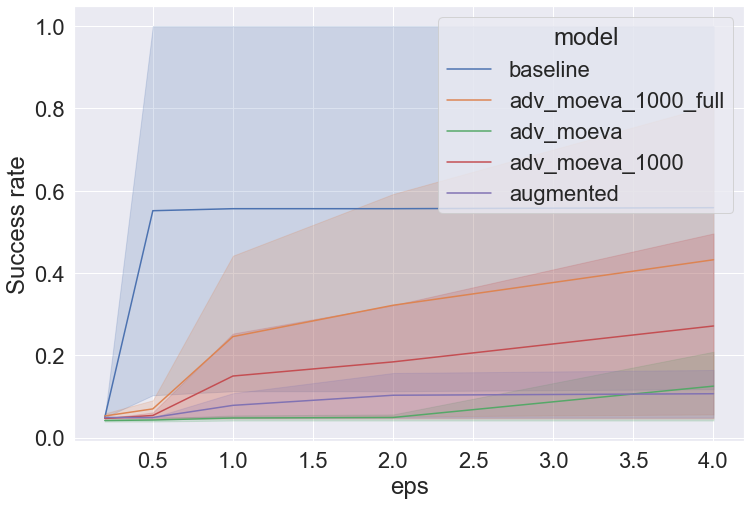

## C-PGD

(25, 20)


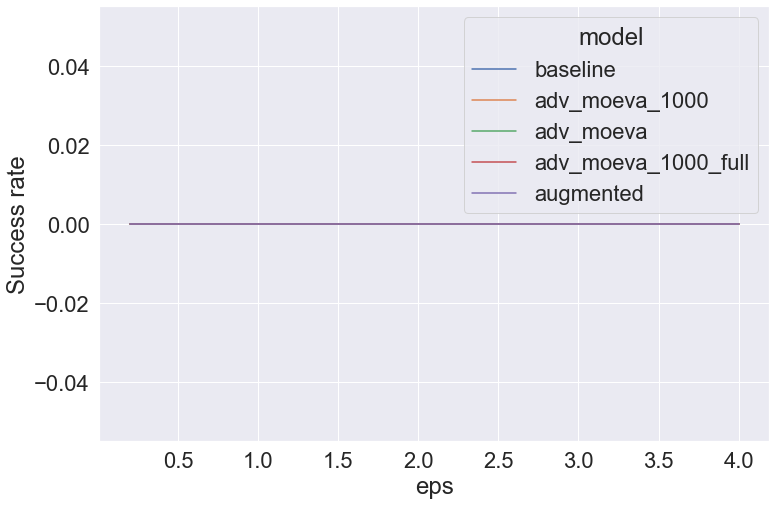

## PGD

(5, 20)


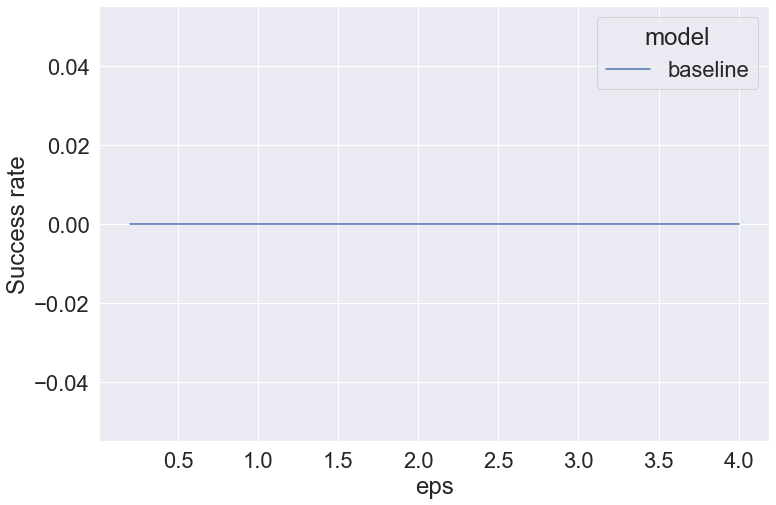

# botnet_rf

## MoEvA2

(40, 20)


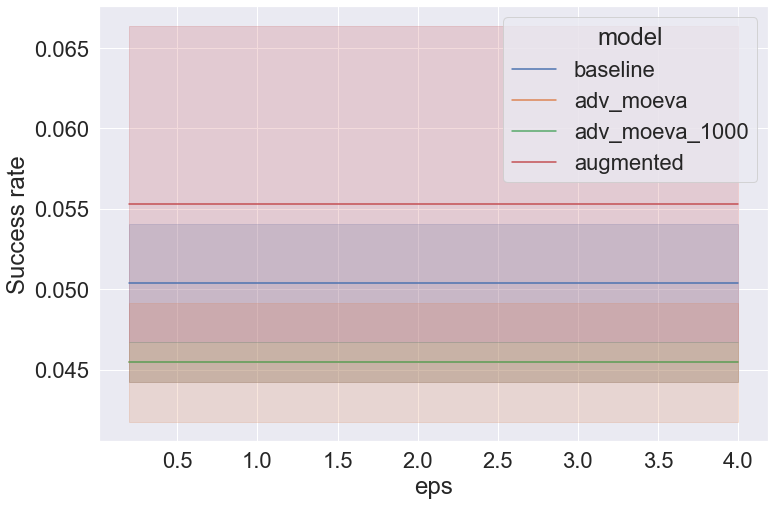

## Iterative Papernot

(30, 20)


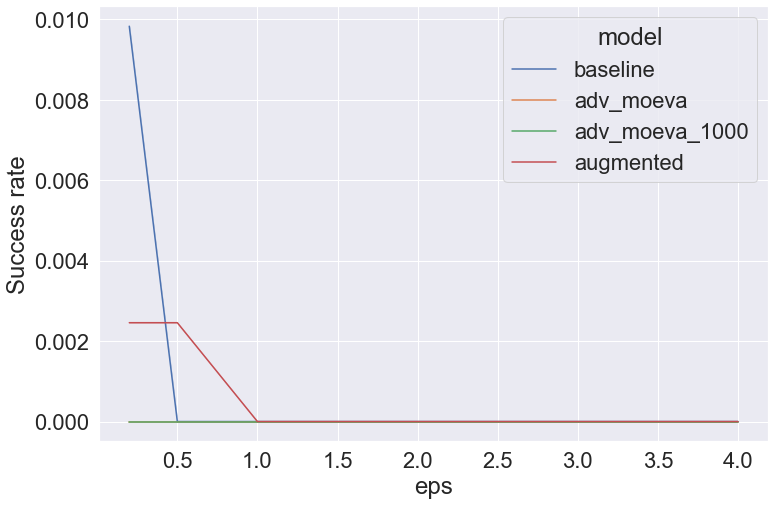

# lcld

## MoEvA2

(20, 20)


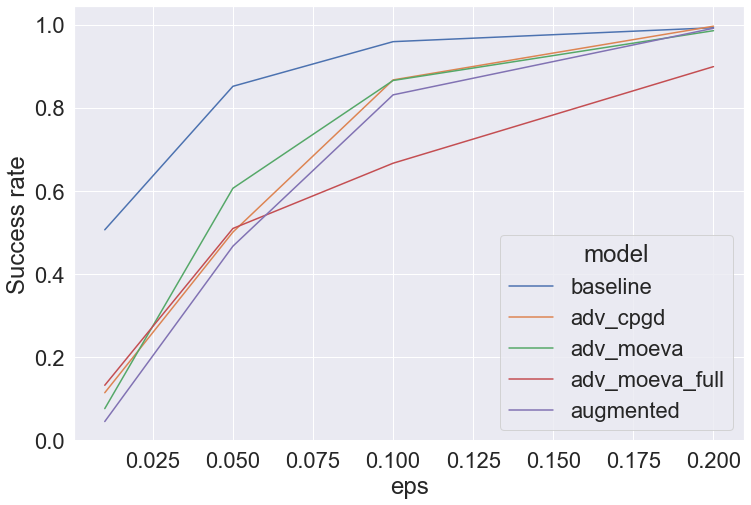

## C-PGD

(20, 20)


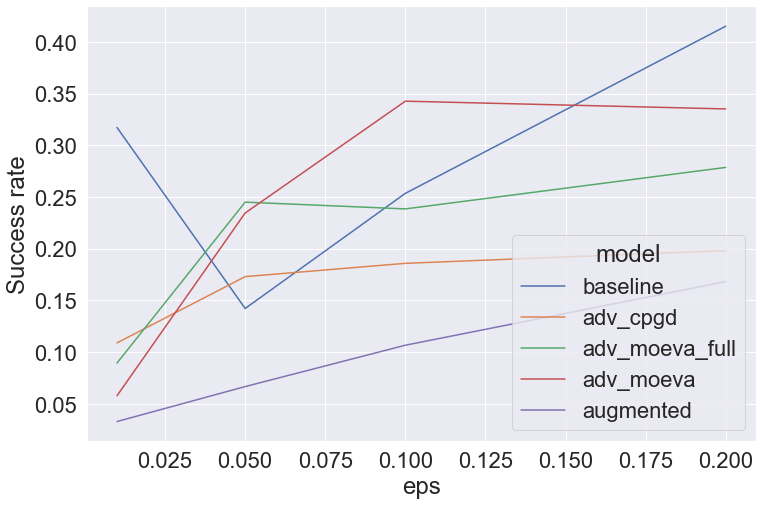

## PGD

(20, 20)


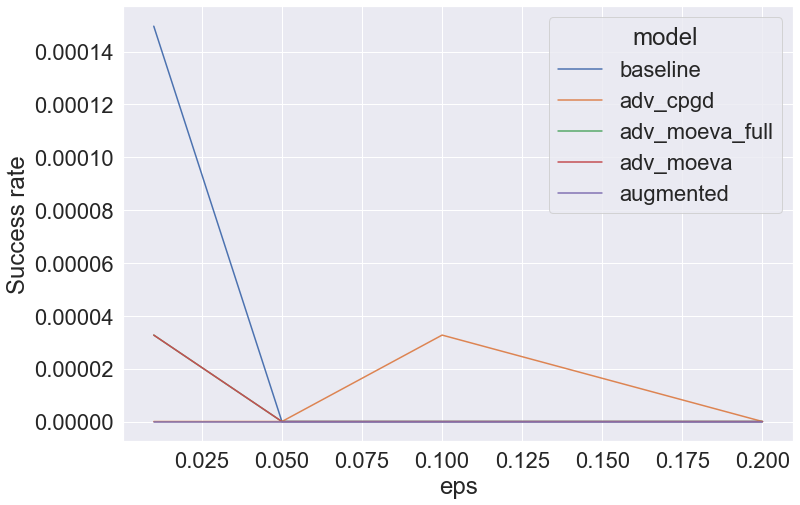

# lcld_rf

## MoEvA2

(12, 20)


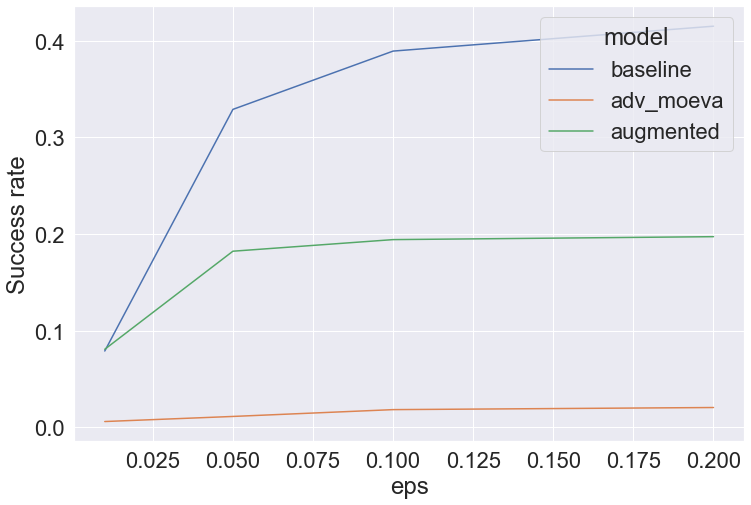

## Iterative Papernot

(12, 20)


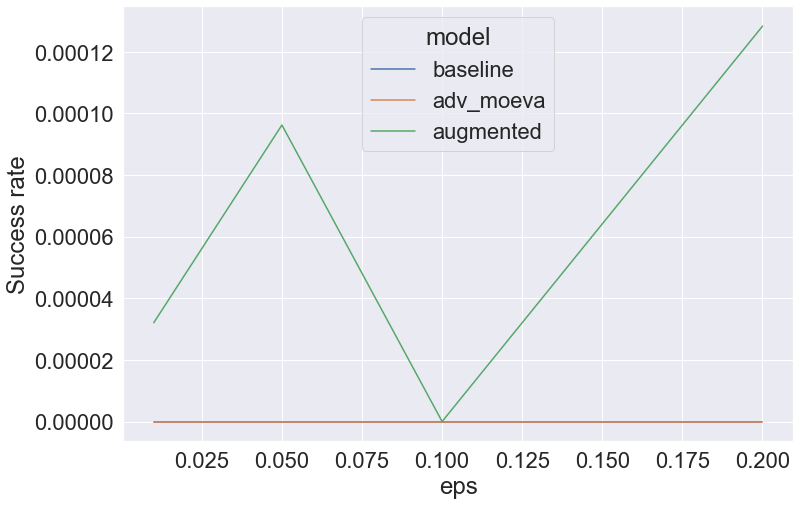

# malware_rf

## MoEvA2

(12, 20)


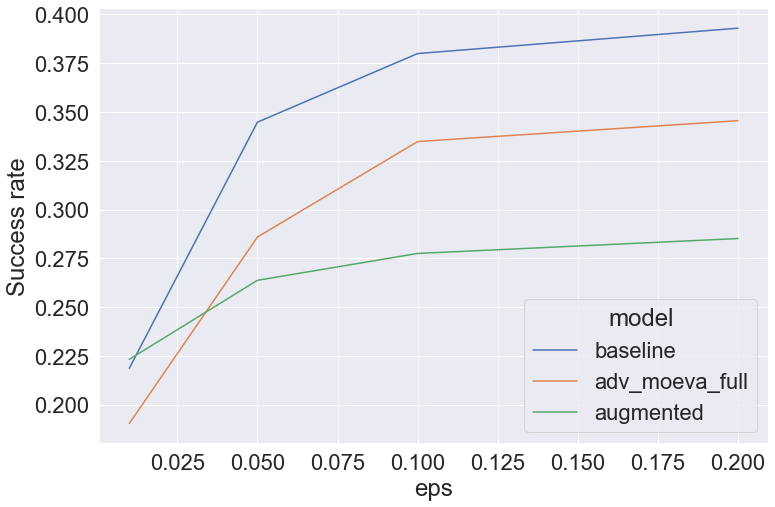

## Iterative Papernot

(12, 20)


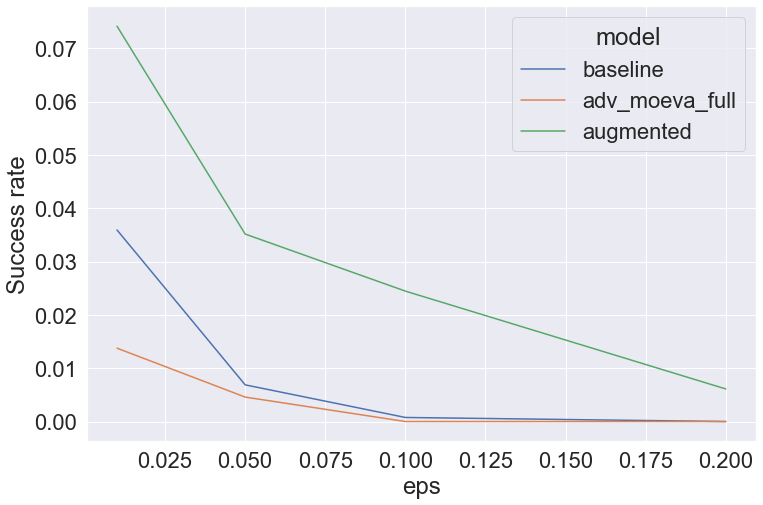

# url

## MoEvA2

(16, 20)


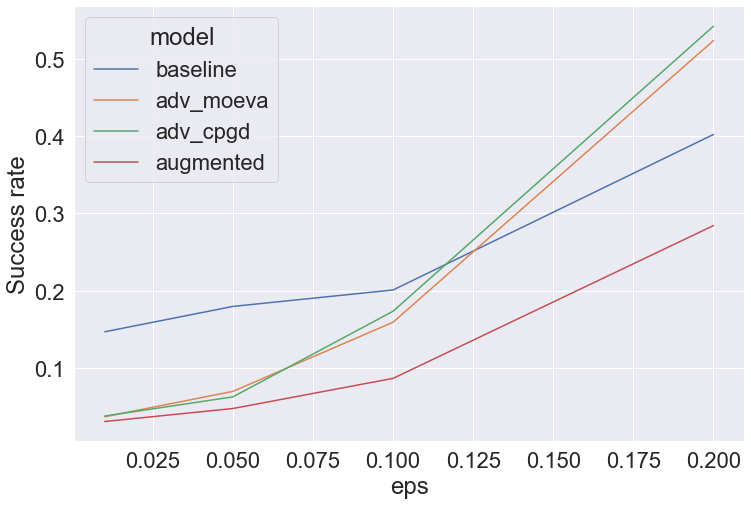

## PGD

(4, 20)


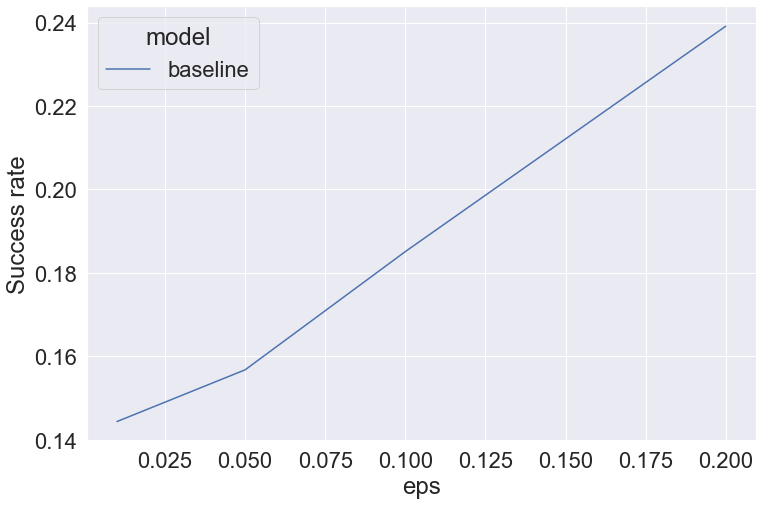

## C-PGD

(16, 20)


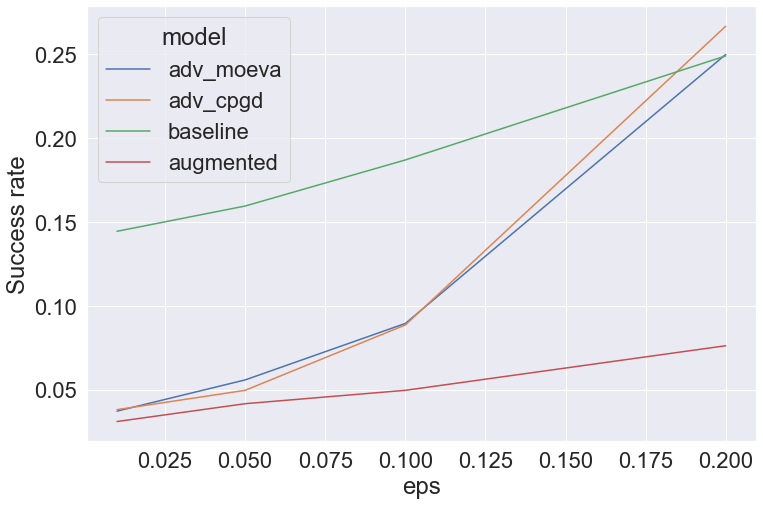

# url_rf

## MoEvA2

(20, 20)


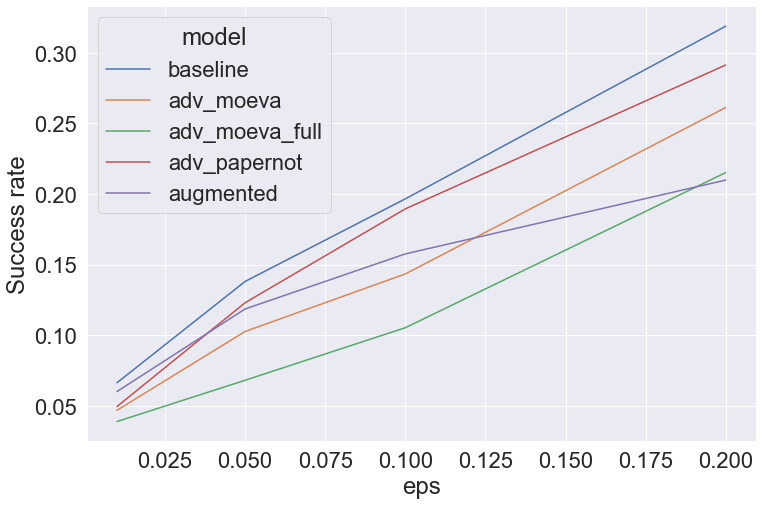

## Iterative Papernot

(20, 20)


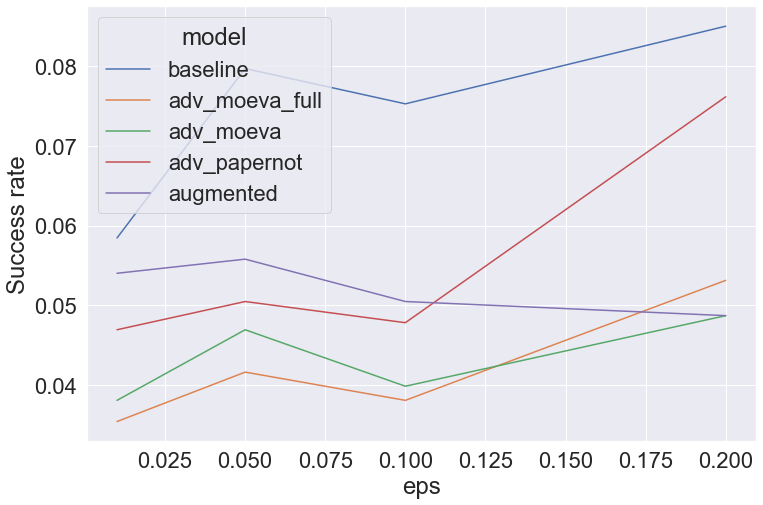

In [13]:

filter_df = (~(metrics_df["attack_name_human"].isna()))
filtered = metrics_df[filter_df]
filtered["attack_and_budget"] = filtered["attack_name_human"] + filtered["budget"].astype(str).copy()
for project in projects:
    display(Markdown(f"# {project}"))
    filter_df = filtered["project_name"] == project
    filtered_project = filtered[filter_df]

    for attack_name_human in filtered_project["attack_name_human"].unique():
        display(Markdown(f"## {attack_name_human}"))

        filter_df = filtered_project["attack_name_human"] == attack_name_human
        filtered_attack = filtered_project[filter_df]
        print(filtered_attack.shape)
        # display(filtered_attack)
        sns.lineplot(x="eps", y="o7",
                 hue="model",
                 data=filtered_attack,)
        plt.xlabel("eps")
        plt.ylabel("Success rate")
        # plt.title(title)
        plt.show()

    # sorted_df = filtered_project.sort_values(by=["project_name", "model", "sort_attacks", "budget"])
    # to_display = sorted_df[columns_to_display_rq2]
    # to_display = to_display.rename(columns=columns_human_name)
    # display(Markdown(f"{to_display.to_markdown()}"))

# Supplementary

In [15]:
columns_to_display_rq2 = ["budget", "project_eps", "project_name", "model", "attack_name_human","o7"]
columns_human_name = {
    "budget": "Iterations",
    "project_eps": "Distance",
    "project_name": "Project",
    "model": "Defense",
    "attack_name_human": "Attack",
    "o7": "Success rate"
}
sort_attack = ["PGD", "C-PGD", "Iterative Papernot", "MoEvA2"]
sort_attack_rq2 = ["C-PGD", "Iterative Papernot", "MoEvA2"]
metrics_df["project_eps"] = metrics_df["project_name"].map(projects_eps)
metrics_df["sort_attacks"] = metrics_df["attack_name_human"].map(dict(zip(sort_attack, range(len(sort_attack)))))

# RQ2
display(Markdown(f"# RQ2 + RQ3"))
filter_df = (~(metrics_df["attack_name_human"].isna())) & \
            (metrics_df["eps"] == metrics_df["project_eps"]) & \
            (metrics_df["attack_name"] == "moeva")

filtered = metrics_df[filter_df]
for project in projects:
    filter_df = filtered["project_name"] == project
    filtered_project = filtered[filter_df]
    filtered_project = filtered_project[filtered_project["budget"] == filtered_project["budget"].max()]

    sorted_df = filtered_project.sort_values(by=["project_name", "model", "sort_attacks", "budget"])

    to_display = sorted_df[columns_to_display_rq2]
    to_display = to_display.rename(columns=columns_human_name)
    display(Markdown(f"{to_display.to_markdown()}"))

# RQ2 + RQ3

|     |   Iterations |   Distance | Project   | Defense             | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:--------------------|:---------|---------------:|
| 132 |         1000 |          4 | botnet    | adv_moeva           | MoEvA2   |       0.208845 |
| 152 |         1000 |          4 | botnet    | adv_moeva_1000      | MoEvA2   |       0.496314 |
| 127 |         1000 |          4 | botnet    | adv_moeva_1000_full | MoEvA2   |       0.808354 |
| 346 |         1000 |          4 | botnet    | augmented           | MoEvA2   |       0.164619 |
|   9 |         1000 |          4 | botnet    | baseline            | MoEvA2   |       1        |

|     |   Iterations |   Distance | Project   | Defense        | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:---------------|:---------|---------------:|
| 177 |         1000 |          4 | botnet_rf | adv_moeva      | MoEvA2   |      0.04914   |
| 182 |         1000 |          4 | botnet_rf | adv_moeva_1000 | MoEvA2   |      0.046683  |
| 361 |         1000 |          4 | botnet_rf | augmented      | MoEvA2   |      0.0663391 |
|  44 |         1000 |          4 | botnet_rf | baseline       | MoEvA2   |      0.0540541 |

|     |   Iterations |   Distance | Project   | Defense        | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:---------------|:---------|---------------:|
| 201 |          100 |        0.2 | lcld      | adv_cpgd       | MoEvA2   |       0.995977 |
| 205 |          100 |        0.2 | lcld      | adv_moeva      | MoEvA2   |       0.985151 |
| 209 |          100 |        0.2 | lcld      | adv_moeva_full | MoEvA2   |       0.898774 |
| 380 |          100 |        0.2 | lcld      | augmented      | MoEvA2   |       0.990973 |
|  58 |          100 |        0.2 | lcld      | baseline       | MoEvA2   |       0.992272 |

|     |   Iterations |   Distance | Project   | Defense   | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:----------|:---------|---------------:|
| 273 |          100 |        0.2 | lcld_rf   | adv_moeva | MoEvA2   |      0.0205352 |
| 400 |          100 |        0.2 | lcld_rf   | augmented | MoEvA2   |      0.19733   |
|  82 |          100 |        0.2 | lcld_rf   | baseline  | MoEvA2   |      0.415132  |

|     |   Iterations |   Distance | Project    | Defense        | Attack   |   Success rate |
|----:|-------------:|-----------:|:-----------|:---------------|:---------|---------------:|
| 281 |          100 |        0.2 | malware_rf | adv_moeva_full | MoEvA2   |       0.345566 |
| 408 |          100 |        0.2 | malware_rf | augmented      | MoEvA2   |       0.285168 |
|  90 |          100 |        0.2 | malware_rf | baseline       | MoEvA2   |       0.392966 |

|     |   Iterations |   Distance | Project   | Defense        | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:---------------|:---------|---------------:|
| 292 |          100 |        0.1 | url       | adv_cpgd       | MoEvA2   |      0.173605  |
| 288 |          100 |        0.1 | url       | adv_moeva      | MoEvA2   |      0.159433  |
| 296 |          100 |        0.1 | url       | adv_moeva_full | MoEvA2   |      0.141718  |
| 415 |          100 |        0.1 | url       | augmented      | MoEvA2   |      0.0868025 |
|  97 |          100 |        0.1 | url       | baseline       | MoEvA2   |      0.201063  |

|     |   Iterations |   Distance | Project   | Defense        | Attack   |   Success rate |
|----:|-------------:|-----------:|:----------|:---------------|:---------|---------------:|
| 320 |          100 |        0.1 | url_rf    | adv_moeva      | MoEvA2   |       0.14349  |
| 324 |          100 |        0.1 | url_rf    | adv_moeva_full | MoEvA2   |       0.105403 |
| 328 |          100 |        0.1 | url_rf    | adv_papernot   | MoEvA2   |       0.189548 |
| 423 |          100 |        0.1 | url_rf    | augmented      | MoEvA2   |       0.157662 |
| 117 |          100 |        0.1 | url_rf    | baseline       | MoEvA2   |       0.196634 |